# Project # 2 - Exploratory Data Analysis & Data Preparation
Data files:
* Part 1: Exploratory Data Analysis - https://raw.githubusercontent.com/vjavaly/Baruch-CIS-STA-3920/main/data/white_wine_quality.csv
* Part 2: Data Preparation - https://raw.githubusercontent.com/vjavaly/Baruch-CIS-STA-3920/main/data/shoppers.csv

## Project #2 Requirements
* Part 1: Exploratory Data Analysis
  * Load data and examine data
  * Generate summary statistics
  * Generate insights on the dependent variable
  * Display correlation matrix for all variables
* Part 2: Data Preparation
  * Load data and examine data
  * Identify missing values and use SimpleImputer to replace missing values
  * Generate one-hot encodings
  * Perform label encoding
  * Standardize independent variables

In [1]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 02/15/24 20:46:43


## Part 1: Exploratory Data Analysis

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read data file (white_wine_quality.csv) into a dataframe
#  NOTE: field separator is ';'
df = pd.read_csv("white_wine_quality.csv", delimiter=';')

### Examine data

In [4]:
# Display dataframe shape
print("Data Shape:", df.shape)

Data Shape: (4898, 12)


In [5]:
# Display first few rows
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5

### Generate summary statistics on data

In [6]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000         

### Generate insights on the dependent variable
#### Dependent  variable is quality

In [7]:
# Display the distinct classes
print("\nDistinct classes of Quality:")
print(df['quality'].unique())


Distinct classes of Quality:
[6 5 7 8 4 3 9]


In [8]:
# Display the distribution counts for each class
print("\nDistribution of Quality classes:")
print(df['quality'].value_counts())


Distribution of Quality classes:
quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


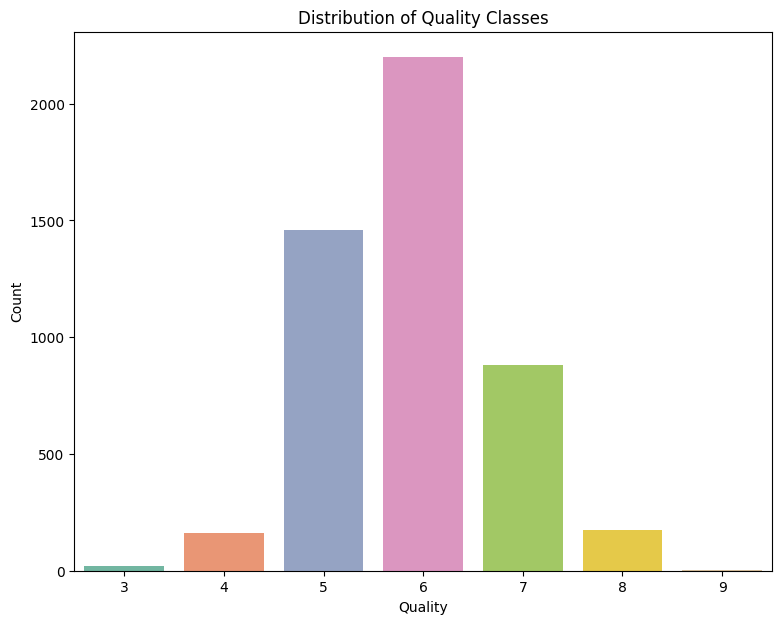

In [9]:
# Graph (i.e. bar graph) the distribution of the classes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 7))
sns.countplot(x='quality', hue='quality', data=df, palette='Set2', legend=False)
plt.title('Distribution of Quality Classes')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

### Display the correlation matrix for all variables

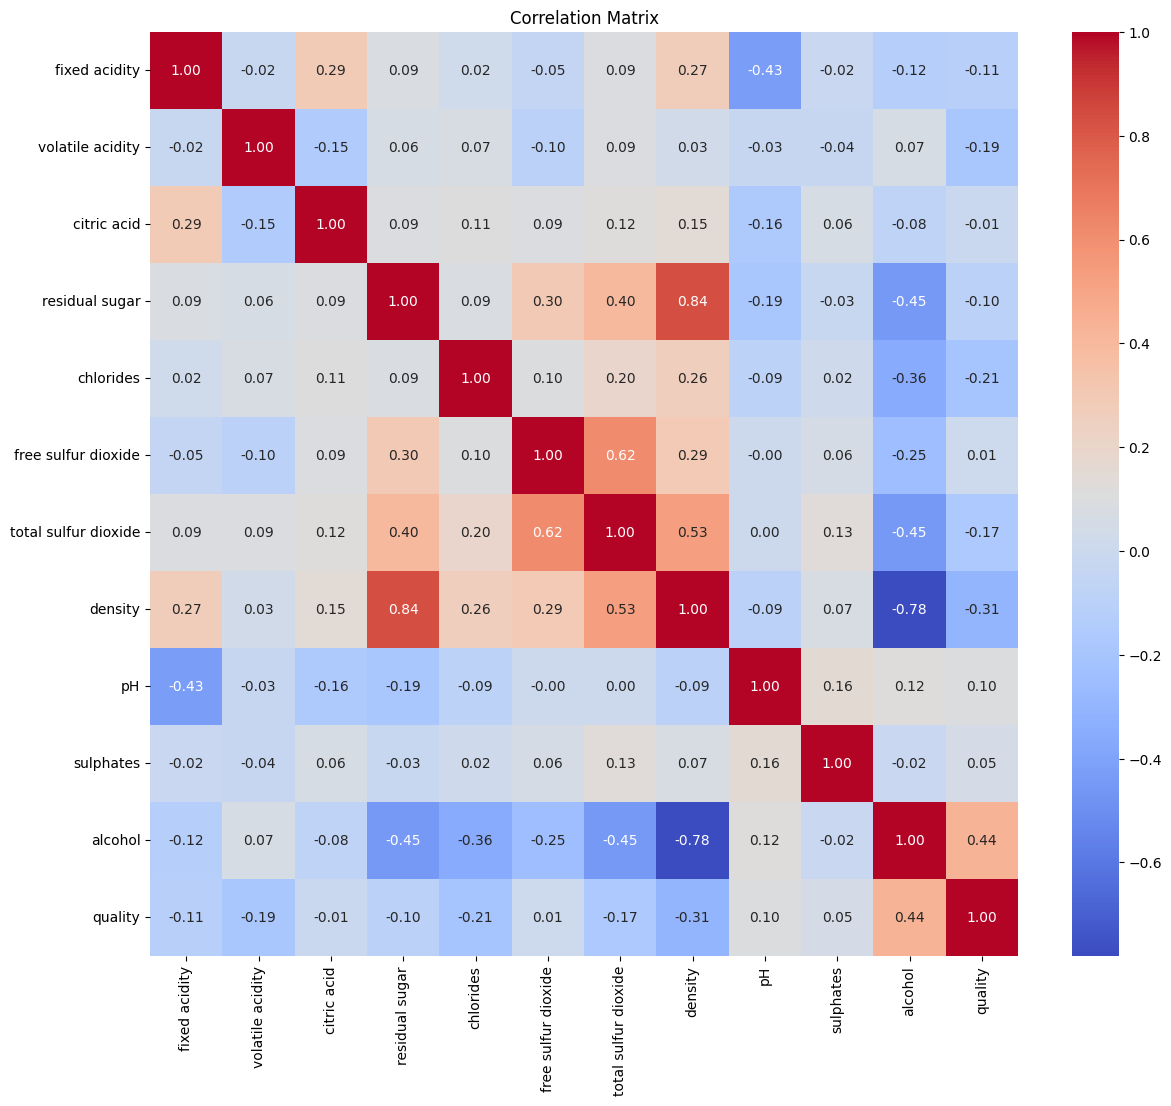

In [10]:
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Part 2: Data Preparation

### NOTE: Final dataframe must be ready for model training (i.e. all numeric and scaled values)

### Import libraries

In [11]:
from sklearn.impute import SimpleImputer             # for handling missing data
from sklearn.preprocessing import LabelEncoder       # for encoding label data
from sklearn.preprocessing import StandardScaler     # for standardizing the data
import pandas as pd

### Load data
* Independent variables: Region, Age, Income
* Dependent variable: Online_Shopper

In [12]:
# Read data file (shoppers.csv) into a dataframe
df = pd.read_csv("shoppers.csv")

### Examine data

In [13]:
# Display dataframe
print("Original Data:")
print(df)

Original Data:
   Region   Age   Income Online_Shopper
0   India  49.0      NaN             No
1  Brazil  32.0  57600.0            Yes
2     USA   NaN      NaN             No
3  Brazil  43.0  73200.0             No
4     USA  45.0      NaN            Yes
5   India  40.0  69600.0            Yes
6  Brazil   NaN  62400.0             No
7   India  53.0  94800.0            Yes
8     USA  55.0      NaN             No
9   India   NaN  80400.0            Yes


### Identify missing values

In [14]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Region            0
Age               3
Income            4
Online_Shopper    0
dtype: int64


### Impute missing values

#### Use the SimpleImputer to replace ALL missing values

In [15]:
imputer = SimpleImputer(strategy="mean")
df[['Age', 'Income']] = imputer.fit_transform(df[['Age', 'Income']])


### Recheck missing values

In [16]:
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
Region            0
Age               0
Income            0
Online_Shopper    0
dtype: int64


### Display updated dataframe

In [17]:
print("\nData After Handling Missing Values:")
print(df)



Data After Handling Missing Values:
   Region        Age   Income Online_Shopper
0   India  49.000000  73000.0             No
1  Brazil  32.000000  57600.0            Yes
2     USA  45.285714  73000.0             No
3  Brazil  43.000000  73200.0             No
4     USA  45.000000  73000.0            Yes
5   India  40.000000  69600.0            Yes
6  Brazil  45.285714  62400.0             No
7   India  53.000000  94800.0            Yes
8     USA  55.000000  73000.0             No
9   India  45.285714  80400.0            Yes


### Generate one-hot encodings for Region column

In [18]:
unique_regions = df['Region'].unique()

# If there is more than one unique value in 'Region' column, generate one-hot encodings
if len(unique_regions) > 1:
    df = pd.get_dummies(df, columns=['Region'], prefix=['Region'])
else:
    print("\nWarning: 'Region' column has only one unique value. Dummy variables not created.")

### Encode labels

In [19]:
# Encode Online Shopper column
label_encoder = LabelEncoder()
df['Online_Shopper'] = label_encoder.fit_transform(df['Online_Shopper'])


### Standardize independent variables

In [20]:
scaler = StandardScaler()
df[['Age', 'Income']] = scaler.fit_transform(df[['Age', 'Income']])

### Display entire final dataframe

In [21]:
print("\nFinal Dataframe :")
print(df)


Final Dataframe :
        Age    Income  Online_Shopper  Region_Brazil  Region_India  Region_USA
0  0.604586  0.000000               0          False          True       False
1 -2.162557 -1.631371               1           True         False       False
2  0.000000  0.000000               0          False         False        True
3 -0.372053  0.021187               0           True         False       False
4 -0.046507  0.000000               1          False         False        True
5 -0.860372 -0.360173               1          False          True       False
6  0.000000 -1.122891               0           True         False       False
7  1.255678  2.309343               1          False          True       False
8  1.581224  0.000000               0          False         False        True
9  0.000000  0.783905               1          False          True       False
